In [ ]:
pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
import os
os.environ ["WANDB_MODE"] = "offline"
from transformers import (
BertForSequenceClassification, BertTokenizer, GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments
)
from datasets import load_dataset
import matplotlib.pyplot as plt
#
# Load the IMDB dataset
dataset = load_dataset("imdb")
# Define BERT and GPT models and tokenizers
bert_model_name = "bert-base-uncased"
gpt_model_name = "gpt2"
#Load BERT model and tokenizer for classification
bert_tokenizer =BertTokenizer.from_pretrained (bert_model_name)
bert_model = BertForSequenceClassification.from_pretrained (bert_model_name, num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Load GPT-2 model and tokenizer for generation
gpt_tokenizer = GPT2Tokenizer.from_pretrained(gpt_model_name)
gpt_model = GPT2LMHeadModel.from_pretrained(gpt_model_name)
gpt_tokenizer.pad_token = gpt_tokenizer.eos_token # Set padding token
# Sample a few entries from the dataset
print("Sample IMDB review:", dataset["train"] [0]["text"])
# Prepare the dataset for BERT by tokenizing
def tokenize_function(examples):
  return bert_tokenizer (examples ["text"], padding="max_length", truncation=True, max_length=128)
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "label"])

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Sample IMDB review: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few 

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
# Training arguments for BERT
training_args =TrainingArguments (
output_dir="./bert_results",
evaluation_strategy="epoch",
num_train_epochs=1,
# For demonstration purposes
per_device_train_batch_size=8,
report_to="none" # Disable all logging integrations
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Fine-tune BERT model on IMDB
trainer =Trainer(
model=bert_model,
args=training_args,
train_dataset=tokenized_datasets ["train"].shuffle().select(range(1000)), #Use a subset for quick training
eval_dataset=tokenized_datasets ["test"].shuffle().select(range (100)),
)
print("Training BERT on IMDB dataset...")
trainer.train()
# Function to predict sentiment using the fine-tuned BERT model
def predict_sentiment(text):
  inputs = bert_tokenizer (text, return_tensors="pt")
  with torch.no_grad():
    outputs= bert_model (**inputs)
    logits =outputs.logits
    sentiment =torch.argmax(logits).item()
  return "Positive" if sentiment == 1 else "Negative"

Training BERT on IMDB dataset...


Epoch,Training Loss,Validation Loss
1,No log,0.674701


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Text generation prompt: In a world where artificial intelligence


`GPT2SdpaAttention` is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Generated text: In a world where artificial intelligence is becoming more and more prevalent, it's important to understand how it works.

The first step is to identify the problem. The problem is that artificial intelligences are not just a problem for humans, but for


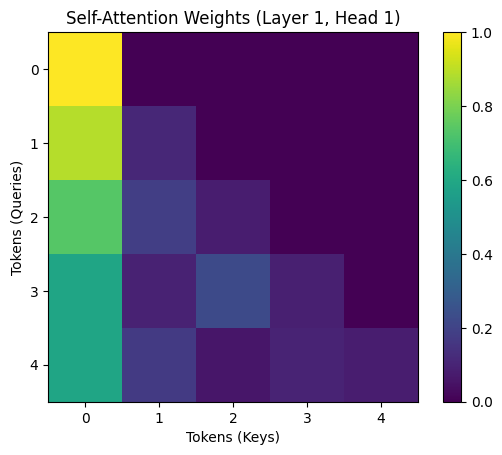

In [ ]:
# Generate text using GPT-2
def generate_text(prompt, max_length=50):
  input_ids =gpt_tokenizer (prompt, return_tensors="pt").input_ids
  output = gpt_model.generate(input_ids, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2)
  return gpt_tokenizer.decode (output [0], skip_special_tokens=True)
#Test text generation with a prompt
sample_prompt = "In a world where artificial intelligence"
print("Text generation prompt:", sample_prompt)
print("Generated text:", generate_text(sample_prompt))
# Visualizing attention for self-attention in GPT-2
def plot_attention (prompt):
  input_ids= gpt_tokenizer (prompt, return_tensors="pt").input_ids
  outputs = gpt_model(input_ids, output_attentions=True)
  attentions = outputs.attentions # List of attention tensors for each layer
  # Plot attention weights for the first layer, first head
  plt.imshow(attentions [0] [0] [0].detach().numpy(), cmap="viridis")
  plt.colorbar()
  plt.title("Self-Attention Weights (Layer 1, Head 1)")
  plt.xlabel("Tokens (Keys)")
  plt.ylabel("Tokens (Queries)")
plt.show()
# Visualize attention on a sample prompt
plot_attention("The future of AI is")

GPT-2


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments
from datasets import load_dataset
import random
# Load dataset (we'll use IMDB movie reviews as an example)
dataset = load_dataset("imdb", split="train[:1%]")  # Use 1% for demonstration
# Sample a few entries from the dataset
print("Sample IMDB review:", dataset[0]["text"])
# Step 1: Function to Initialize a GPT-2 Model with Custom Size
def load_custom_gpt(model_size="gpt2"):
  tokenizer = GPT2Tokenizer.from_pretrained(model_size)
  model = GPT2LMHeadModel.from_pretrained (model_size)
  tokenizer.pad_token = tokenizer.eos_token # Set padding token for GPT-2
  return model, tokenizer
# Allow students to specify model size
model_size = "gpt2-medium" # Options: "gpt2", "gpt2-medium", "gpt2-large", "gpt2-x1"
model, tokenizer = load_custom_gpt(model_size=model_size)
print(f"Loaded model size: {model_size}")
# Step 2: Text Generation with Custom Parameters
def generate_custom_text(prompt, max_length=50, temperature=1.0, top_k=50, top_p=0.95, repetition_penalty=1.0):
  input_ids= tokenizer (prompt, return_tensors="pt").input_ids
  output = model.generate(
  input_ids,
  max_length=max_length,
  temperature=temperature,
  top_k=top_k,
  top_p=top_p,
  repetition_penalty=repetition_penalty,
  num_return_sequences=1,
  no_repeat_ngram_size=2
  )
  return tokenizer.decode(output[0] ,skip_special_tokens=True)
# Example prompt for text generation
prompt = "In a world where artificial intelligence"
# Step 3: Experimenting with Hyperparameters
max_length = 100 # Max tokens in the generated text
temperature = 0.7  # Control randomness; lower more focused, higher more random
top_k = 30 # Only sample from top-k most likely tokens
top_p = 0.9 #Nucleus sampling, sample from tokens with cumulative probability <= top_p
repetition_penalty = 1.2 # Penalize repeated tokens

# Generate text with custom settings
print("Generated text with customized parameters: \n", generate_custom_text(
prompt,
max_length=max_length,
temperature=temperature,
top_k=top_k,
top_p=top_p,
repetition_penalty=repetition_penalty
))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Sample IMDB review: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:612: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `30` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected be

Loaded model size: gpt2-medium
Generated text with customized parameters: 
 In a world where artificial intelligence is becoming more and less of a threat, it's important to remember that we're still in the early stages. We don't yet have fully developed AI systems capable for self-driving cars or robots with humanlike capabilities like Siri.
 "We need people who are willing," says Dr Karpinski."To be able [to] understand what they want from their own lives without having to ask them questions about how things work on an everyday basis" — which means


In [ ]:


# Step 4: Fine-Tuning with Custom Training Hyperparameters (Optional)
# Define TrainingArguments for customization
train_args = TrainingArguments(
output_dir="./gpt_custom_results",
overwrite_output_dir=True,
num_train_epochs=1, # Customizable
per_device_train_batch_size=2,
# Customizable
learning_rate=5e-5, # Customizable
save_steps=500,
save_total_limit=1,
)


#Create Trainer for Fine-Tuning
def fine_tune_gpt(model, tokenizer, dataset):
# Tokenize dataset
  def tokenize_function(examples):
    return tokenizer (examples ["text"], truncation=True, padding="max_length", max_length=128)
  tokenized_datasets= dataset.map(tokenize_function, batched=True)
  tokenized_datasets = tokenized_datasets.map(lambda examples: {'labels': examples['input_ids']}, batched=True)

  tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask","labels"])

  trainer= Trainer (
  model=model,
  args=train_args,
  train_dataset=tokenized_datasets
  )
  print("Starting fine-tuning...")
  trainer.train()
# Uncomment to run fine-tuning on a subset of the dataset (optional)
fine_tune_gpt(model, tokenizer, dataset.shuffle().select(range(100)))



Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Starting fine-tuning...


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
